
<br>
A Multilayer Perceptron implementation example using TensorFlow library.<br>
This example is using the MNIST database of handwritten digits<br>
(http://yann.lecun.com/exdb/mnist/)<br>
Author: Aymeric Damien<br>
Project: https://github.com/aymericdamien/TensorFlow-Examples/<br>


Import MNIST data

(50000, 28, 28) (50000,)


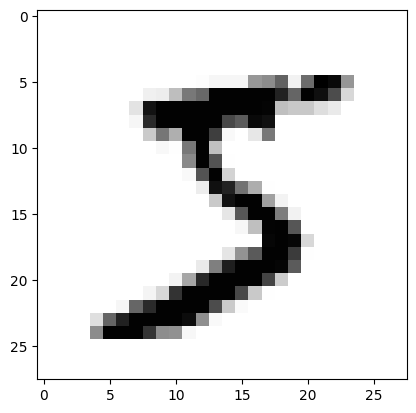

In [4]:

import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline
def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]    
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])  
    return X_train, y_train, X_val, y_val, X_test, y_test
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
## Printing dimensions
print(X_train.shape, y_train.shape)
## Visualizing the first digit
plt.imshow(X_train[0], cmap="Greys");

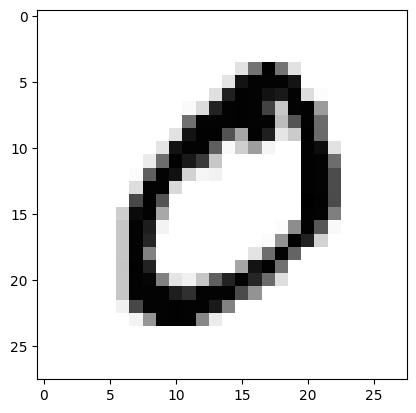

In [5]:
plt.imshow(X_train[1], cmap="Greys");

In [6]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/10
192/192 [==============================] - 10s 33ms/step - loss: 0.3789 - accuracy: 0.8938 - val_loss: 0.1778 - val_accuracy: 0.9487
Epoch 2/10
192/192 [==============================] - 6s 30ms/step - loss: 0.1448 - accuracy: 0.9578 - val_loss: 0.1242 - val_accuracy: 0.9640
Epoch 3/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0966 - accuracy: 0.9723 - val_loss: 0.1047 - val_accuracy: 0.9696
Epoch 4/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0711 - accuracy: 0.9788 - val_loss: 0.1020 - val_accuracy: 0.9690
Epoch 5/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.0886 - val_accuracy: 0.9728
Epoch 6/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0396 - accuracy: 0.9890 - val_loss: 0.0843 - val_accuracy: 0.9743
Epoch 7/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.0808

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               274750    
                                                                 
 dense_1 (Dense)             (None, 50)                17550     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 292,810
Trainable params: 292,810
Non-trainable params: 0
_________________________________________________________________


https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-create-a-basic-mlp-classifier-with-the-keras-sequential-api.md